In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

## Повнозв’язаної нейромережі прямого поширення (fully connected feed-forward network)

In [61]:
ds = pd.read_csv("Paris.csv")
print(ds.head())

   squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price category  
0      4313   9005     956               0             7  7559081.5

In [62]:
scaler = StandardScaler()
scaler.fit(ds.drop('category', axis=1))
scaled_features = pd.DataFrame(scaler.transform(ds.drop('category', axis=1)),columns=ds.columns[:-1])
print(scaled_features)

      squareMeters  numberOfRooms   hasYard   hasPool    floors  cityCode  \
0         0.891562      -1.643518 -1.017554  1.006421  0.440453 -1.408453   
1         1.073956      -0.394180  0.982749  1.006421  1.652041 -0.373880   
2         0.203033       0.265193 -1.017554  1.006421 -1.082685 -0.543643   
3        -0.610092      -0.116549 -1.017554 -0.993620 -1.532703 -0.768361   
4         0.714521      -1.088257  0.982749  1.006421  1.375106 -0.419941   
...            ...            ...       ...       ...       ...       ...   
9995     -1.673244       1.341012 -1.017554  1.006421 -1.567320  0.789772   
9996     -0.190009      -0.741218  0.982749  1.006421 -1.325002 -0.538506   
9997      1.180654      -1.643518 -1.017554 -0.993620  0.648154  1.058689   
9998      0.318559       0.681639 -1.017554 -0.993620  1.582807  0.194121   
9999     -1.683183       1.167493 -1.017554 -0.993620 -0.044181 -1.096819   

      cityPartRange  numPrevOwners      made  isNewBuilt  hasStormProtector

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, ds['hasStorageRoom'], random_state=0)

In [64]:
Y_train = to_categorical(Y_train, 3)
Y_test = to_categorical(Y_test, 3)

In [65]:
model = keras.Sequential([
    layers.Dense(32, input_dim = 17,activation="relu"),
    layers.Dense(3, input_dim = 17, activation="softmax")
])
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 32)                576       
                                                                 
 dense_21 (Dense)            (None, 3)                 99        
                                                                 
Total params: 675
Trainable params: 675
Non-trainable params: 0
_________________________________________________________________
None


In [67]:
model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
235/235 [==============================] - 1s 2ms/step - loss: 0.5262 - accuracy: 0.8515
Epoch 2/30
235/235 [==============================] - 1s 2ms/step - loss: 0.1568 - accuracy: 0.9981
Epoch 3/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9999
Epoch 4/30
235/235 [==============================] - 1s 2ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 5/30
235/235 [==============================] - 1s 2ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 6/30
235/235 [==============================] - 1s 2ms/step - loss: 0.0183 - accuracy: 1.0000
Epoch 7/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0140 - accuracy: 1.0000
Epoch 8/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 9/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0093 - accuracy: 1.0000
Epoch 10/30
235/235 [==============================] - 1s 4ms/step - loss: 0.0079 - accuracy: 1.0000

In [68]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.0016567796701565385
Test accuracy: 1.0


## Згорткової (convolutional) нейромережі

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import glob
import tqdm
import tensorflow
from pathlib import Path
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [108]:
generator = ImageDataGenerator()
batches   = generator.flow_from_directory(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\train')

Found 90 images belonging to 6 classes.


In [109]:
def loadImages(path):
    image_files = sorted([os.path.join(path, file)
                          for file in os.listdir(path)
                          if file.endswith('.jpeg') or file.endswith('.jpg') or file.endswith('.png')])
    return image_files

In [110]:
im0_images=loadImages(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\train\acai')
im1_images=loadImages(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\train\cupuacu')
im2_images=loadImages(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\train\graviola')
im3_images=loadImages(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\train\guarana')
im4_images=loadImages(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\train\pupunha')
im5_images=loadImages(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\train\tucuma')

In [111]:
train = Path(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\train')
test = Path(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\test')

In [112]:
def ps(images,images_num):
    for i in range(0,images_num):
        plt.figure(figsize = (20,4))
        plt.imshow(plt.imread(images[i]))
        if images ==im0_images:
            plt.title("acai")
        if images ==im1_images:
            plt.title("cupuacu")
        if images ==im2_images:
            plt.title("graviola")
        if images ==im3_images:
            plt.title("guarana")
        if images ==im4_images:
            plt.title("pupunha")
        if images ==im5_images:
            plt.title("tucuma")

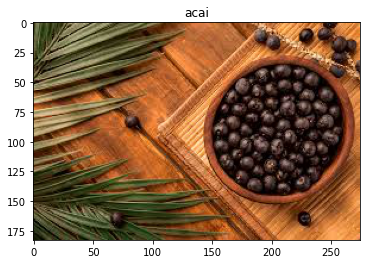

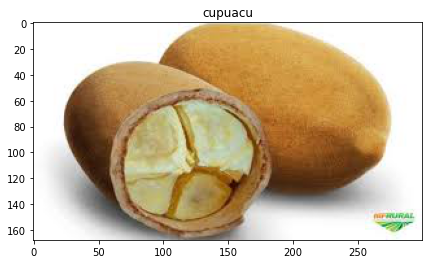

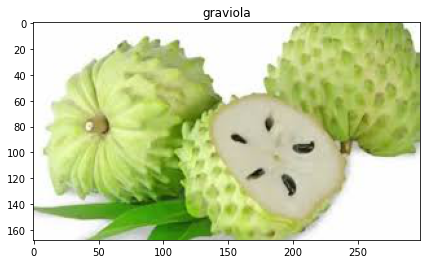

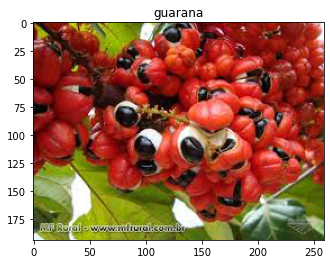

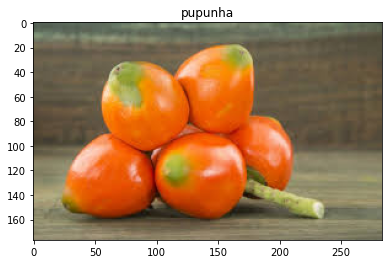

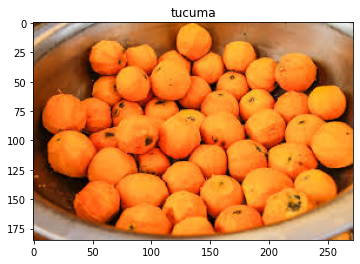

In [113]:
ps(im0_images,1)
ps(im1_images,1)
ps(im2_images,1)
ps(im3_images,1)
ps(im4_images,1)
ps(im5_images,1)

In [114]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\train', target_size = (64,64), 
                                             batch_size = 32, 
                                             class_mode = 'binary')


test_set = test_datagen.flow_from_directory(r'C:\Users\kateh\Labs\da_Labs\ds_frutas_am\test', target_size = (64,64), 
                                             batch_size = 32, 
                                             class_mode = 'binary')

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [115]:
model = Sequential()
model.add(Conv2D(32 , 3, 3,  input_shape = (64, 64, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size  = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [116]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 3200)              0         
                                                                 
 dense_13 (Dense)            (None, 128)               409728    
                                                                 
 dense_14 (Dense)            (None, 1)                 129       
                                                                 
Total params: 410,753
Trainable params: 410,753
Non-trainable params: 0
________________________________________________

In [119]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [120]:
early_stop = EarlyStopping(monitor='val_loss',patience=4)
model.fit(train_generator, epochs = 10 ,validation_data=validation_generator,callbacks=early_stop,verbose = 1)

Epoch 1/10
3/3 [==============================] - 1s 178ms/step - loss: 0.4647 - accuracy: 0.8333 - val_loss: 0.4767 - val_accuracy: 0.8333
Epoch 2/10
3/3 [==============================] - 0s 112ms/step - loss: 0.4639 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.8333
Epoch 3/10
3/3 [==============================] - 0s 109ms/step - loss: 0.4580 - accuracy: 0.8333 - val_loss: 0.4565 - val_accuracy: 0.8333
Epoch 4/10
3/3 [==============================] - 0s 120ms/step - loss: 0.4579 - accuracy: 0.8333 - val_loss: 0.4587 - val_accuracy: 0.8333
Epoch 5/10
3/3 [==============================] - 0s 120ms/step - loss: 0.4569 - accuracy: 0.8333 - val_loss: 0.4652 - val_accuracy: 0.8333
Epoch 6/10
3/3 [==============================] - 0s 107ms/step - loss: 0.4551 - accuracy: 0.8333 - val_loss: 0.4554 - val_accuracy: 0.8333
Epoch 7/10
3/3 [==============================] - 0s 108ms/step - loss: 0.4550 - accuracy: 0.8333 - val_loss: 0.4550 - val_accuracy: 0.8333
Epoch 8/10
3/3 [====

In [121]:
loses=pd.DataFrame(model.history.history)
print(loses.head())

       loss  accuracy  val_loss  val_accuracy
0  0.464704  0.833333  0.476700      0.833333
1  0.463858  0.833333  0.457298      0.833333
2  0.458011  0.833333  0.456510      0.833333
3  0.457921  0.833333  0.458740      0.833333
4  0.456876  0.833333  0.465206      0.833333


<AxesSubplot:>

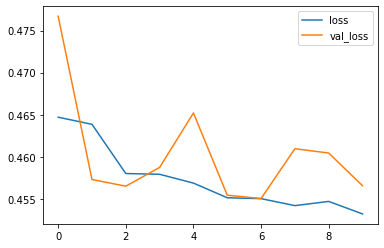

In [122]:
loses[['loss','val_loss']].plot()

<AxesSubplot:>

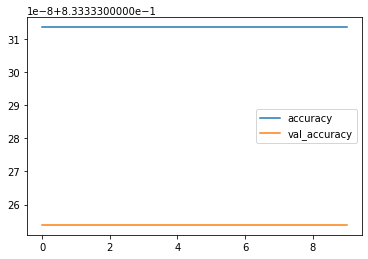

In [123]:
loses[['accuracy','val_accuracy']].plot()

## Рекурентні мережі 

In [25]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import BatchNormalization
from keras.layers import Dropout

from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [41]:
ds = pd.read_csv("APPLE_iPhone_SE.csv", names=['Ratings', 'Comment'], header=0)

In [42]:
print(ds.head())

          Ratings                                            Comment
5          Super!  Great camera for pics and videos Battery life ...
5       Must buy!  Great device. Let me tell the Pros..1. Superb ...
5   Great product  Who all loves older size i.e., 4.7 inch type s...
5  Simply awesome  This iPhone SE is the best phone ever you get....
5  Classy product  This is my second iphone after iphone 4s. I’ve...


In [43]:
Comment_lenghts = list(map(len, ds.Comment.values))
print('Max len ',np.max(Comment_lenghts))
print('Min len ', np.min(Comment_lenghts))
print('Mean size ',np.mean(Comment_lenghts))
print('Median size ',np.median(Comment_lenghts))

Max len  509
Min len  11
Mean size  100.75424688561722
Median size  53.0


In [44]:
print(ds.Ratings.value_counts())

Wonderful                           544
Best in the market!                 398
Perfect product!                    394
Great product                       390
Super!                              382
                                   ... 
Not a good product                    1
Awesome product from apple            1
Disappointed with Look and Feel       1
Poor Battery, Overall Okay phone      1
Go for it with a blind eye!           1
Name: Ratings, Length: 264, dtype: int64


In [46]:
dictionary_length = 1000
input_length = 100

tokenizer = Tokenizer(num_words=dictionary_length)
tokenizer.fit_on_texts(ds.Comment.values)

In [47]:
post_seq = tokenizer.texts_to_sequences(ds.Comment.values)

In [48]:
post_seq_padded = pad_sequences(post_seq, maxlen=input_length)

In [49]:
X = post_seq_padded
X_array = np.array(X)
Y = ds['Ratings'].values
Y = 1*(Y=='positive')
Y_array = np.array(Y)

x, y = shuffle(X_array, Y_array, random_state=23)

In [50]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=23)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=23)

In [51]:
model2 = Sequential()
model2.add(Embedding(dictionary_length, 2, input_length=input_length))
model2.add(Dense(32,activation="relu"))
model2.add(Dense(32,activation="relu"))
model2.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(16, return_sequences=True)))
model2.add(Bidirectional(SimpleRNN(16, return_sequences=False)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 2)            2000      
                                                                 
 dense_4 (Dense)             (None, 100, 32)           96        
                                                                 
 dense_5 (Dense)             (None, 100, 32)           1056      
                                                                 
 bidirectional (Bidirectiona  (None, 100, 32)          1568      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 32)          1568      
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)              

In [52]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
history2 = model2.fit(x=x_train, y=y_train, batch_size=256, verbose=1, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
22/22 [==============================] - 3s 158ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2/10
22/22 [==============================] - 4s 164ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 3/10
22/22 [==============================] - 4s 160ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/10
22/22 [==============================] - 4s 162ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/10
22/22 [==============================] - 3s 159ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 6/10
22/22 [==============================] - 4s 167ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 7/10
22/22 [==============================] - 4s 189ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 

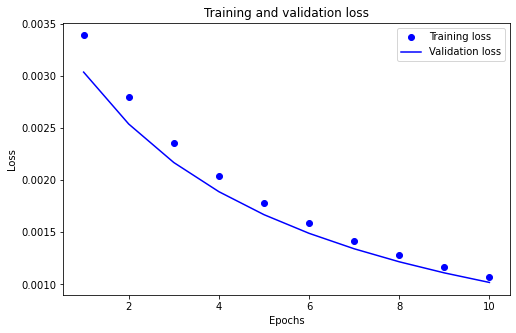

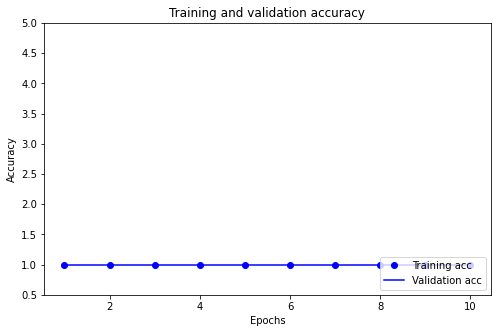

In [64]:
history_dict = history2.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,5))
plt.show()